In [2]:
import numpy as np
import healpy as hp
from astropy.io import ascii
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline

In [38]:
print 'Reading files'
w = ascii.read('wen.csv') 
r = fits.open('redmapper.fits') 
r = r[1].data
print len(w)
print len(r)

Reading files
132684
26111


In [39]:
# RA e DEC - catalogo Wen
w['RAJ2000'], w['DEJ2000']

(<MaskedColumn name='RAJ2000' dtype='float64' length=132684>
   0.00236
   0.00957
   0.01377
   0.01475
   0.01945
   0.02024
   0.02303
   0.02482
   0.02643
   0.02755
   0.02762
   0.02765
       ...
 359.96988
 359.97192
 359.97241
  359.9729
 359.97311
 359.97504
 359.97543
 359.98712
 359.99329
   359.995
 359.99677
  359.9986, <MaskedColumn name='DEJ2000' dtype='float64' length=132684>
  32.20925
   5.28827
  31.23175
  31.78564
   2.47386
  -3.54679
  35.76957
   15.4299
  22.20558
  10.11333
  31.87626
  29.35813
       ...
   0.69856
  -9.76429
  13.70903
   -7.9587
   3.45559
  30.13158
 -11.13708
  22.67506
  13.29671
   0.70175
  21.78513
  -3.43781)

In [40]:
# RA e DEC catalogo Redmapper
r['RA'], r['DEC']

(array([ 239.58332907,  250.08254839,  197.87295717, ...,  180.83079888,
         153.82422578,  135.96337099]),
 array([ 27.23341292,  46.71153135,  -1.34111628, ...,  52.37043161,
         43.63535754,  15.20173173]))

In [41]:
NSIDE = 512

In [42]:
# Area de cada pixel
hp.nside2pixarea(NSIDE, degrees = True)

0.013113963206424481

In [43]:
phi_w = np.deg2rad(w['RAJ2000'])
theta_w = np.deg2rad(90.-w['DEJ2000'])

In [44]:
phi_r = np.deg2rad(r['RA'])
theta_r = np.deg2rad(90.-r['DEC'])

In [45]:
wpix = hp.ang2pix(NSIDE, theta_w, phi_w)

In [46]:
n = np.arange(hp.nside2npix(NSIDE))

In [47]:
rpix = hp.ang2pix(NSIDE, theta_r, phi_r)

In [48]:
m = np.arange(hp.nside2npix(NSIDE))

In [49]:
print(hp.get_map_size(m))
print(hp.get_map_size(n))

3145728
3145728


In [50]:
print rpix, wpix

[ 854355  429098 1609829 ...,  326435  487928 1158917] DEJ2000
-------
 734208
1426432
 754688
 742400
1504256
1668096
 652288
1152000
 977920
1295360
    ...
1840127
1201151
1790976
1479679
 783360
1876992
 967679
1209344
1553408
 988160
1668096
Length = 132684 rows


In [51]:
print len(wpix)
print len(rpix)

132684
26111


In [52]:
#Retira os numeros de pixels repetidos
wpix = np.unique(wpix)
rpix = np.unique(rpix)
print len(wpix)
print len(rpix)

122801
25941


Codigo do Match:
Primeira parte designa-se uma lista onde sera salvo os valores do match. E dois intervalos, um com o valor do rykoff e outro do wen.
Depois com uso do if, se compara o numero do pixel de um catalogo com o de outro, para assim obtermos o match.

In [53]:
lista = []
rp = range(0,len(rpix))
wp = range(0,len(wpix))
for wp in wpix: 
    for rp in rpix:
        if wp==rp:
            lista.append(wp)

In [54]:
print len(lista) 

21627


In [55]:
match = hp.pix2ang(NSIDE, lista)

In [56]:
print match

(array([ 0.3704957 ,  0.37374115,  0.37374115, ...,  1.76604493,
        1.76604493,  1.76604493]), array([ 3.23339244,  3.13822185,  3.18541315, ...,  0.05215535,
        0.05522331,  0.10431069]))


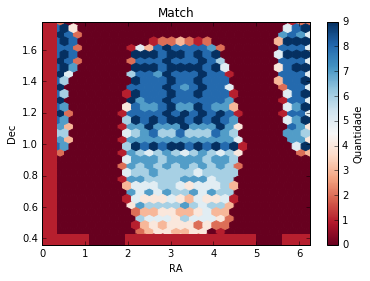

In [66]:
# Grafico de Nside = 32, area do pixel = 3.357, len(match) = 3288
x = match[1]
y = match[0]
gridsize = 30
plt.hexbin(x, y, gridsize=gridsize, marginals=True, cmap=plt.cm.RdBu)
plt.xlabel('RA')
plt.ylabel('Dec')
cb = plt.colorbar()
cb.set_label('Quantidade')
plt.title('Match')

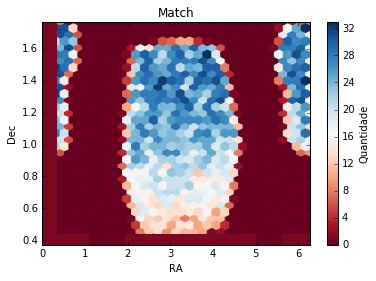

In [91]:
# Grafico de Nside = 64, area do pixel = 0.839, len(match) = 10429
x = match[1]
y = match[0]
gridsize = 30
plt.hexbin(x, y, gridsize=gridsize, marginals=True, cmap=plt.cm.RdBu)
plt.xlabel('RA')
plt.ylabel('Dec')
cb = plt.colorbar()
cb.set_label('Quantidade')
plt.title('Match')

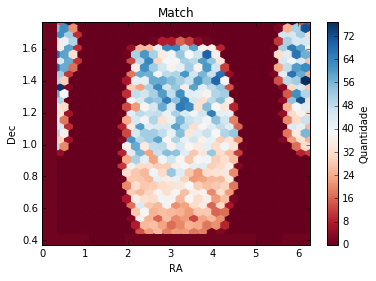

In [164]:
# Grafico de Nside = 128, area do pixel = 0.209, len(match) = 18958
x = match[1]
y = match[0]
gridsize = 30
plt.hexbin(x, y, gridsize=gridsize, marginals=True, cmap=plt.cm.RdBu)
plt.xlabel('RA')
plt.ylabel('Dec')
cb = plt.colorbar()
cb.set_label('Quantidade')
plt.title('Match')

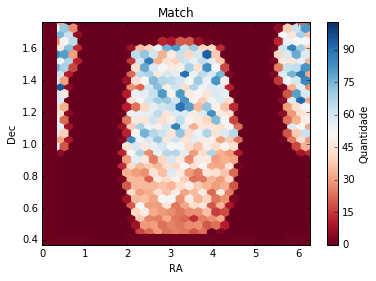

In [185]:
# Grafico de Nside = 256, area do pixel = 0.052, len(match) = 22399
x = match[1]
y = match[0]
gridsize = 30
plt.hexbin(x, y, gridsize=gridsize, marginals=True, cmap=plt.cm.RdBu)
plt.xlabel('RA')
plt.ylabel('Dec')
cb = plt.colorbar()
cb.set_label('Quantidade')
plt.title('Match')

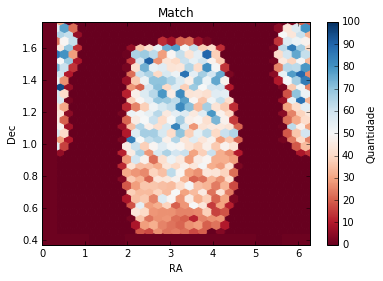

In [206]:
# Grafico de Nside = 512, area do pixel = 0.013, len(match) = 21627
x = match[1]
y = match[0]
gridsize = 30
plt.hexbin(x, y, gridsize=gridsize, marginals=True, cmap=plt.cm.RdBu)
plt.xlabel('RA')
plt.ylabel('Dec')
cb = plt.colorbar()
cb.set_label('Quantidade')
plt.title('Match')

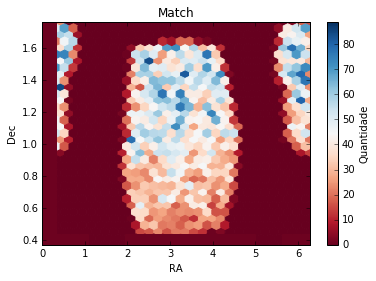

In [227]:
# Grafico de Nside = 1024, area do pixel = 0.003, len(match) = 19496
x = match[1]
y = match[0]
gridsize = 30
plt.hexbin(x, y, gridsize=gridsize, marginals=True, cmap=plt.cm.RdBu)
plt.xlabel('RA')
plt.ylabel('Dec')
cb = plt.colorbar()
cb.set_label('Quantidade')
plt.title('Match')

# TESTE

In [4]:
wmap_map_I = hp.read_map('wmap_band_imap_r9_7yr_W_v4.fits')

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


/Users/lucascoimbra257/.local/lib/python2.7/site-packages/healpy/fitsfunc.py:335: UserWarning: No INDXSCHM keyword in header file : assume IMPLICIT
  "assume {}".format(schm))


Ordering converted to RING


0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


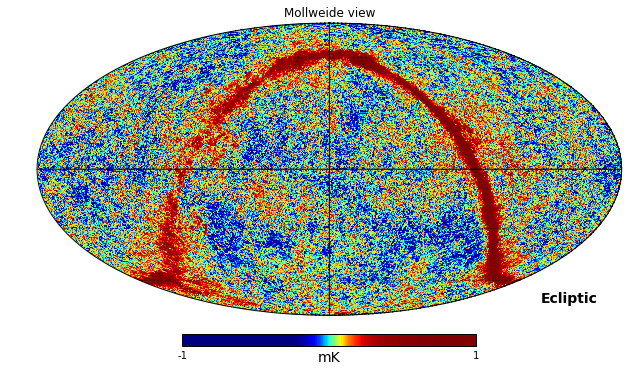

In [5]:
hp.mollview(wmap_map_I, coord=['G','E'], unit='mK', norm='hist', min=-1,max=1, xsize=2000)
hp.graticule()

Como as coordenadas elipitas vao ser uteis apenas olhando para este plot?

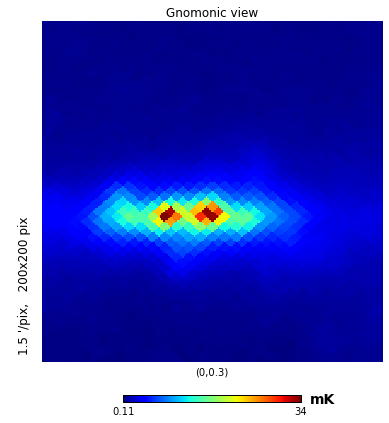

In [6]:
hp.gnomview(wmap_map_I, rot=[0,0.3], unit='mK', format='%.2g')

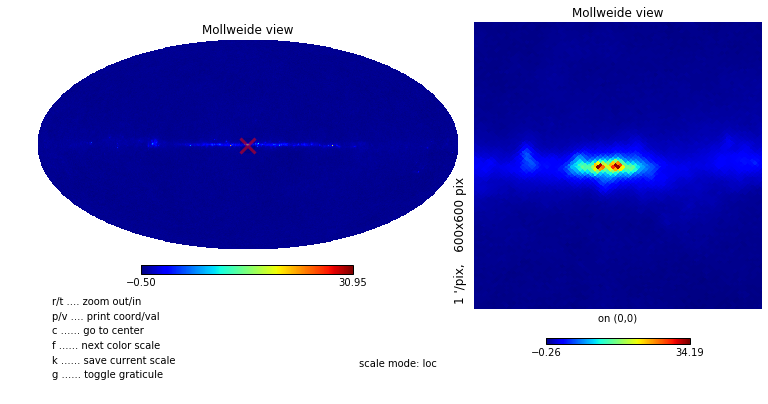

In [7]:
hp.zoomtool.mollzoom(wmap_map_I)

In [8]:
mask = hp.read_map('wmap_temperature_analysis_mask_r9_7yr_v4.fits', nest = True).astype(np.bool)

NSIDE = 512
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT


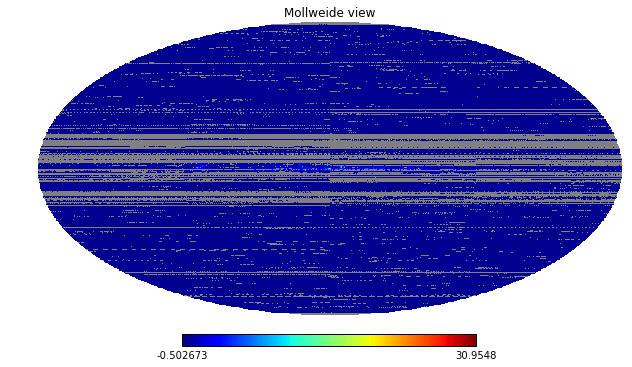

In [9]:
wmap_map_I_masked = hp.ma(wmap_map_I)
wmap_map_I_masked.mask = np.logical_not(mask)
hp.mollview(wmap_map_I_masked.filled())

Nesse plot, ele fala que as marcas cinzas sao os pixels invisiveis. No centro do plot, estao os pixel que nos serao uteis, por isso que nao tem marcas cinzas em cima deles, certo? E o que esse plot traria de informacao pra gente tambem?